In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [8]:
import data_preprocessing

energy_consumption_data_train, energy_consumption_data_test = data_preprocessing.preprocess_data("Energy Consumption Dataset.csv")

energy_consumption_data_train.head()

,Wind Velocity for Station 02014,Sun Duration for Station 02014,Air Temperature for Station 02014,Precipitation Amount for Station 02014,Wind Velocity for Station 03987,Sun Duration for Station 03987,Air Temperature for Station 03987,Precipitation Amount for Station 03987,Wind Velocity for Station 03379,Sun Duration for Station 03379,Air Temperature for Station 03379,Precipitation Amount for Station 03379,Wind Velocity for Station 04928,Sun Duration for Station 04928,Air Temperature for Station 04928,Precipitation Amount for Station 04928,Quarter,Month,Energy Consumption
2015-02-20 10:00:00,0.469072,0.033333,0.408425,0.0,0.260638,0.000000,0.283465,0.0,0.141975,1.0,0.458498,0.0,0.291925,1.0,0.357285,0.0,1,2,42923.00
2015-02-20 11:00:00,0.371134,0.733333,0.434066,0.0,0.239362,0.683333,0.364173,0.0,0.129630,1.0,0.494071,0.0,0.260870,1.0,0.423154,0.0,1,2,40497.00
2015-02-20 12:00:00,0.350515,0.016667,0.454212,0.0,0.308511,1.000000,0.405512,0.0,0.203704,1.0,0.509881,0.0,0.260870,1.0,0.489022,0.0,1,2,40872.00
2015-02-20 13:00:00,0.412371,0.050000,0.459707,0.0,0.345745,1.000000,0.427165,0.0,0.148148,1.0,0.521739,0.0,0.254658,1.0,0.504990,0.0,1,2,42470.75
2015-02-20 14:00:00,0.319588,0.016667,0.459707,0.0,0.265957,0.766667,0.437008,0.0,0.080247,1.0,0.537549,0.0,0.416149,1.0,0.508982,0.0,1,2,46082.25


## Exploring the Data for Station 02014 ##

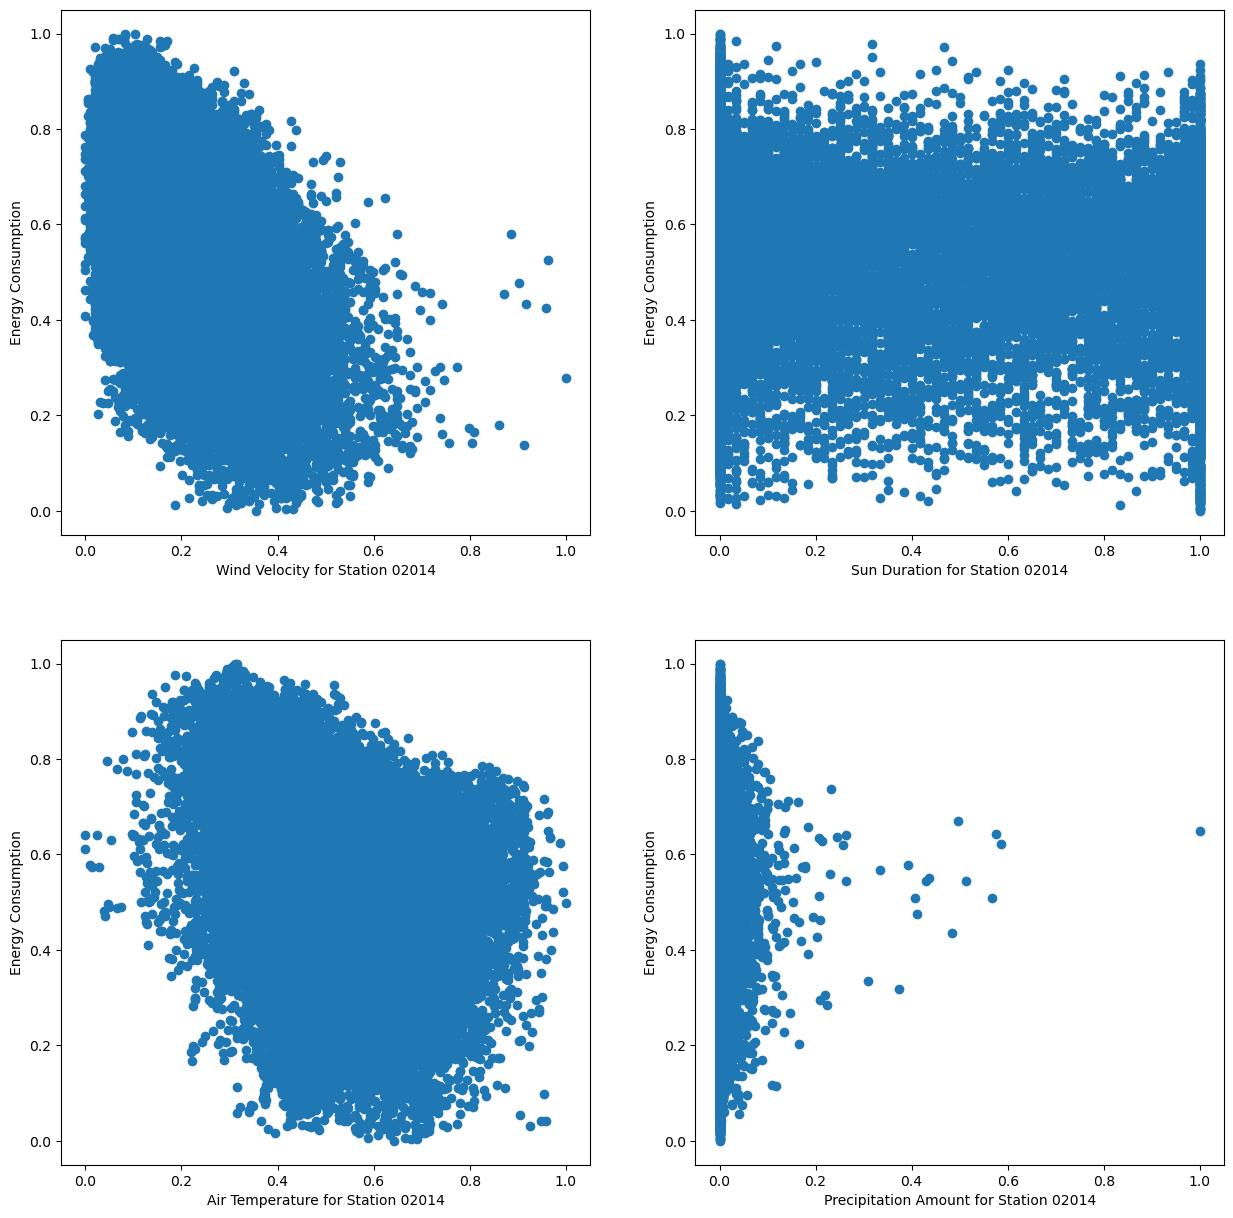

In [32]:
# create a list of all columns that we are considering
features = ['Wind Velocity for Station 02014', 'Sun Duration for Station 02014', 'Air Temperature for Station 02014', 'Precipitation Amount for Station 02014']

# create a figure and specify its size
fig = plt.figure(figsize=(15,15))

# go through all combinations and create one plot for each
figure_index = 1
for column in energy_consumption_data_train.columns[:4]:
    # add a sub plot to the figure
    axs = fig.add_subplot(2,2,figure_index)

    # normalizing
    scaler = MinMaxScaler()
    energy_consumption_data_train[[column, "Energy Consumption"]] = scaler.fit_transform(energy_consumption_data_train[[column, "Energy Consumption"]])
    
    # plot the feature combination
    axs.scatter(energy_consumption_data_train[column], energy_consumption_data_train["Energy Consumption"])
    
    # set the axis labels of the current sub plot
    axs.set_xlabel(column)
    axs.set_ylabel("Energy Consumption")
        
    # increase the figure index (otherwise all plots are drawn in the first subplot)
    figure_index+=1

    
# show the plot
plt.show()

## Applying Linear Regression for Station 02014 ##

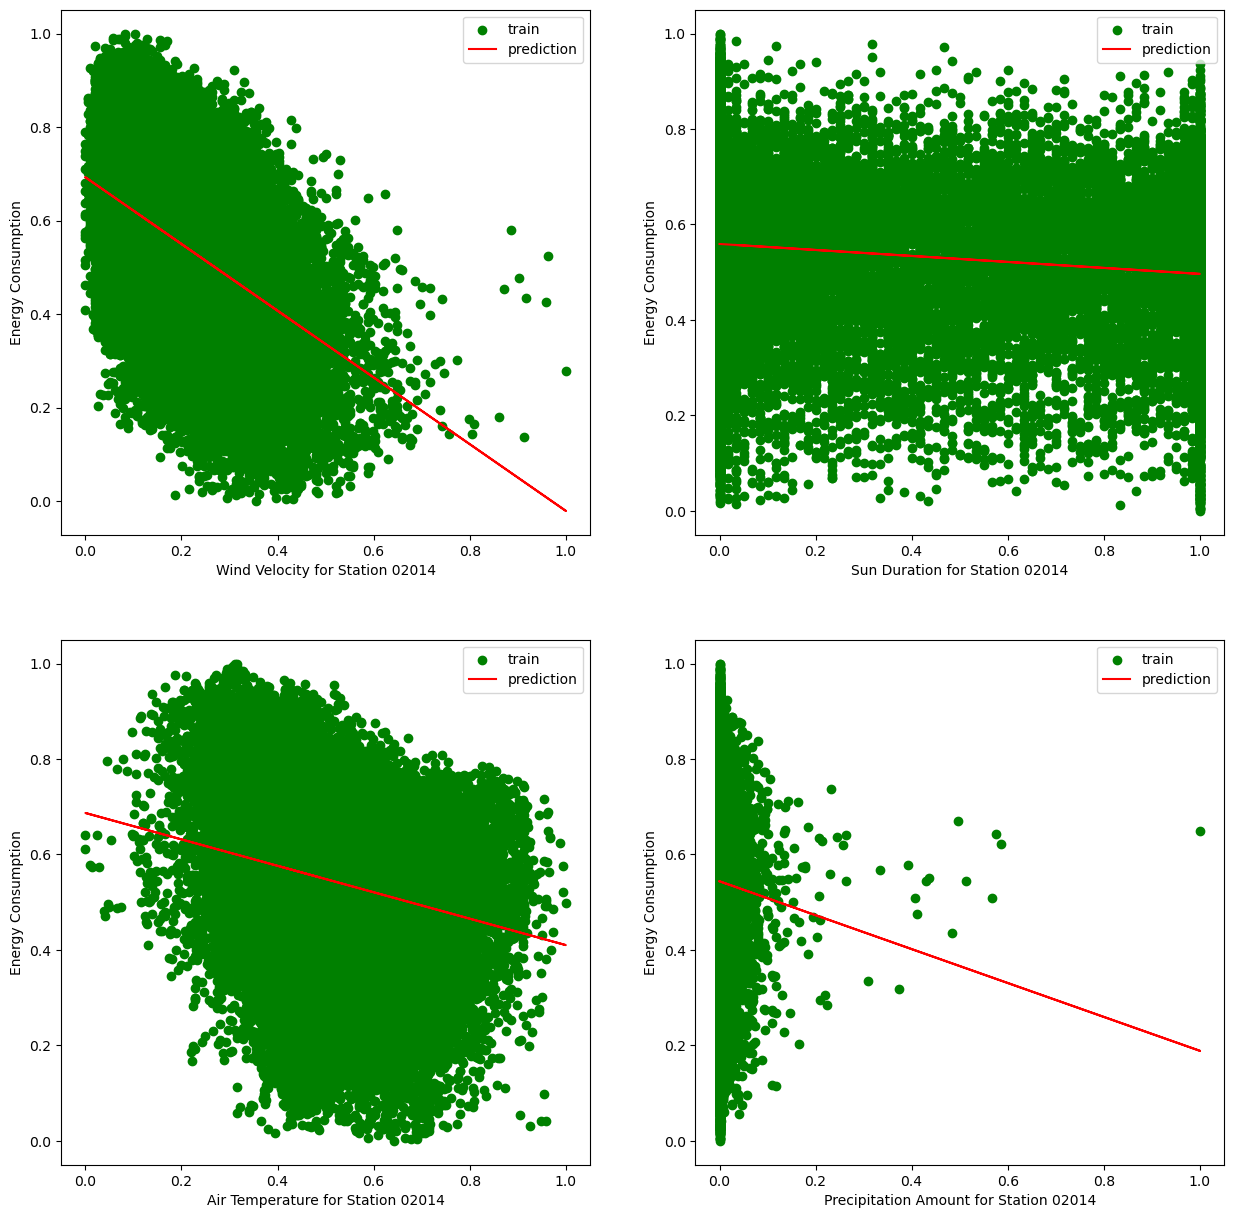

In [41]:
from sklearn.linear_model import LinearRegression

# create and fit a linear regression
estimator = LinearRegression()

# reshaping target data to fit regressions requirements
features = energy_consumption_data_train["Energy Consumption"].values.reshape(-1, 1)

# create a figure and specify its size
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# plotting regression
#figure_index = 1
for i, column in enumerate(energy_consumption_data_train.columns[:4]):
    # Fit the linear regression model to the data
    X = energy_consumption_data_train[[column]]
    Y = energy_consumption_data_train["Energy Consumption"]
    estimator.fit(X, Y)

    #axs = fig.add_subplot(2,2,figure_index)
    ax = axs[i // 2, i % 2]

    # plot the original values
    ax.scatter(X, Y, c='green', label='train')

    # plot the predicted values
    ax.plot(X, estimator.predict(X), c='red', label='prediction')

    ax.set_xlabel(column)
    ax.set_ylabel('Energy Consumption')
    ax.legend()

    # increase the figure index (otherwise all plots are drawn in the first subplot)
    #figure_index+=1

    
# show the plot
plt.show()

## Evaluation with RSME ##